In [4]:
#!pip install pytrends

from pytrends.request import TrendReq

#create a pytrends object. request data from Google Trends

pytrends = TrendReq(hl='en-US')

#extract data about keywords
#max five keywords

keywords = ['Python', 'R', 'C++', 'Java', 'HTML']
pytrends.build_payload(keywords, timeframe='today 5-y')

#specify and get data

data = pytrends.interest_over_time()
data.head()

,Python,R,C++,Java,HTML,isPartial
date,,,,,,
2016-11-27,17,74,80,33,16,False
2016-12-04,17,75,82,32,17,False
2016-12-11,16,75,80,31,16,False
2016-12-18,15,75,76,29,15,False
2016-12-25,12,58,73,24,12,False


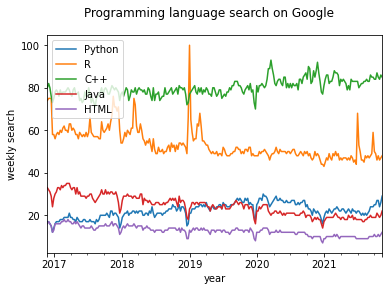

In [18]:
#plot the data

from matplotlib import pyplot as plt

data.plot()

#add titles

plt.suptitle('Programming language search on Google')
plt.xlabel('year')
plt.ylabel('weekly search')
#add a legend

plt.legend(keywords, loc='upper left')
plt.show()

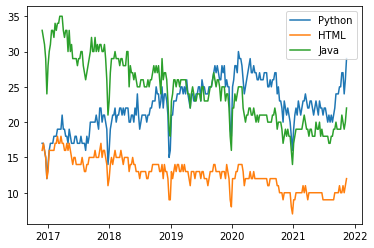

In [25]:
#analyse data

focus =['Python', 'HTML', 'Java']

plt.plot(data[focus])
plt.legend(focus)

In [50]:
#extract country-level data about the keyword

data2 = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

#get the country with the most searches of 'python' over the years
#getting the top 10
data2 = data2['Python'].nlargest(10)
data2

geoName
China          49
Israel         35
Eritrea        30
St. Helena     28
Singapore      25
South Korea    25
Russia         22
Iceland        21
Taiwan         21
Estonia        20
Name: Python, dtype: int32

In [51]:
type(data2)

pandas.core.series.Series

In [71]:
#convert to DataFrame
import pandas as pd


df = pd.DataFrame(data2)


df

,Python
geoName,
China,49
Israel,35
Eritrea,30
St. Helena,28
Singapore,25
South Korea,25
Russia,22
Iceland,21
Taiwan,21


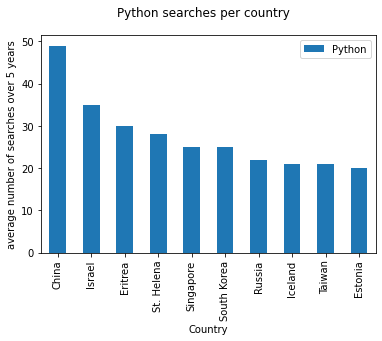

In [72]:
#plot bar chart with pandas

df= df.plot(kind='bar')
#set title
plt.suptitle('Python searches per country')
plt.xlabel('Country')
plt.ylabel('average number of searches over 5 years')

plt.show()

In [74]:
#plot a bar  chart with multiple keywords
data3 = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)
data3 = data3[55:60]
data3

,Python,R,C++,Java,HTML
geoName,,,,,
Cuba,17,16,40,16,11
Curaçao,7,33,47,6,7
Cyprus,14,22,43,12,9
Czechia,14,23,41,13,9
Côte d’Ivoire,6,16,49,23,6


<AxesSubplot:xlabel='geoName'>

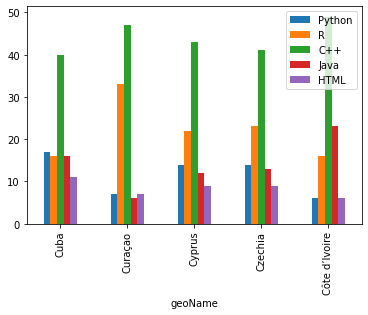

In [75]:
#plot data

data3.plot(kind='bar')
